In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load Texas counties shapefile
texas_counties = gpd.read_file(r"C:\Users\bmmur\OneDrive\Desktop\CCPPI\gz_2010_us_050_00_5m\gz_2010_us_050_00_5m.shp")

In [3]:
# Filter to only Texas counties (STATE code "48")
texas_counties = texas_counties[texas_counties["STATE"] == "48"]

In [4]:
# Split the GEO_ID and take only the code following US (For Merger)
texas_counties['Geo_ID_5'] = texas_counties['GEO_ID'].str.split('US').str[-1]

In [5]:
texas_counties.head()

,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,geometry,Geo_ID_5
746,0500000US48173,48,173,Glasscock,County,900.218,"POLYGON ((-101.7758 31.65132, -101.77608 32.08...",48173
747,0500000US48175,48,175,Goliad,County,852.014,"POLYGON ((-97.57464 28.8133, -97.41734 28.9252...",48175
748,0500000US48179,48,179,Gray,County,925.974,"POLYGON ((-100.53898 35.18314, -101.08628 35.1...",48179
749,0500000US48183,48,183,Gregg,County,273.303,"POLYGON ((-94.57922 32.39492, -94.59139 32.365...",48183
750,0500000US48189,48,189,Hale,County,1004.683,"POLYGON ((-102.09042 34.31313, -101.99802 34.3...",48189


In [6]:
# Then, Load the file that you want to graph
mb_df = pd.read_excel(r"C:\Users\bmmur\OneDrive\Desktop\CCPPI\Minority_Business.xlsx")

In [7]:
mb_df.head()

,GeoID,County,Year,Number of establishments,"Annual payroll ($1,000)","First-quarter payroll ($1,000)",Number of employees,% Black,% Female,% Hispanic,% Veteran
0,48001,"Anderson County, Texas",2022.0,885.0,588204.0,140096.0,12913.0,0.0,14.872521,0.0,0.000000
1,48003,"Andrews County, Texas",2022.0,433.0,422961.0,94966.0,5759.0,0.0,12.011173,0.0,3.351955
2,48005,"Angelina County, Texas",2022.0,1935.0,1230199.0,291226.0,28790.0,0.0,0.000000,0.0,0.000000
3,48007,"Aransas County, Texas",2022.0,577.0,174530.0,40612.0,4401.0,NaN,0.000000,0.0,0.000000
4,48009,"Archer County, Texas",2022.0,236.0,63218.0,13989.0,1385.0,NaN,0.000000,0.0,0.000000


In [8]:
# Convert to String to make sure merge happens
texas_counties['Geo_ID_5'] = texas_counties['Geo_ID_5'].astype(str)
mb_df['GeoID'] = mb_df['GeoID'].astype(str)

# Keep Column Graphing
mb_df_sub = mb_df[['GeoID', 'Number of establishments']]

# Perform the merge
merged_df = texas_counties.merge(mb_df_sub, left_on='Geo_ID_5', right_on='GeoID', how='left')

# Drop Redundant Column
merged_df = merged_df.drop(columns=['GeoID'])

In [9]:
merged_df.head()

,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,geometry,Geo_ID_5,Number of establishments
0,0500000US48173,48,173,Glasscock,County,900.218,"POLYGON ((-101.7758 31.65132, -101.77608 32.08...",48173,38.0
1,0500000US48175,48,175,Goliad,County,852.014,"POLYGON ((-97.57464 28.8133, -97.41734 28.9252...",48175,129.0
2,0500000US48179,48,179,Gray,County,925.974,"POLYGON ((-100.53898 35.18314, -101.08628 35.1...",48179,513.0
3,0500000US48183,48,183,Gregg,County,273.303,"POLYGON ((-94.57922 32.39492, -94.59139 32.365...",48183,4058.0
4,0500000US48189,48,189,Hale,County,1004.683,"POLYGON ((-102.09042 34.31313, -101.99802 34.3...",48189,644.0


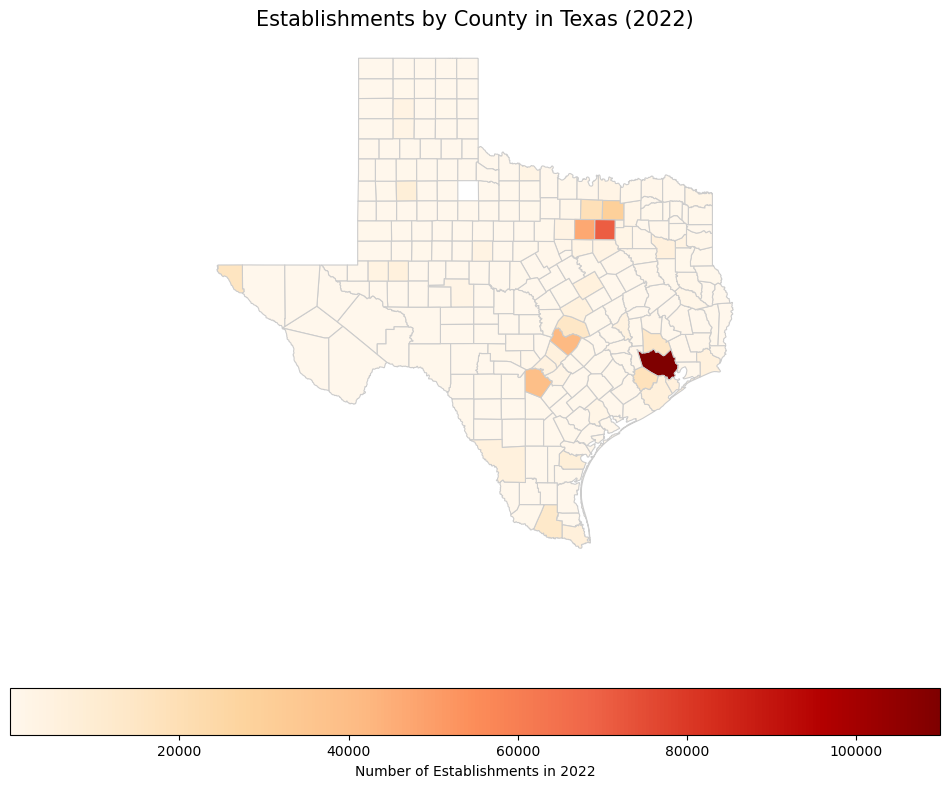

In [15]:
# Plot the map!
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
merged_df.plot(column="Number of establishments",
                    cmap="OrRd",                
                    linewidth=0.8,              
                    ax=ax,
                    edgecolor="0.8",            
                    legend=True,
                    legend_kwds={
                        'label': "Number of Establishments in 2022",
                        'orientation': "horizontal"
                    })

ax.set_title("Establishments by County in Texas (2022)", fontdict={'fontsize': '15', 'fontweight' : '3'})
ax.set_axis_off() 

plt.show()